# Análise dos dados do Bolsa Família

## Por: Suzana

# Ajustes prévios dos dados

In [2]:
# import de pacote facilitador para manusear dados
import pandas

In [2]:
# importando os dados do arquivo Novo.csv para uma estrutura de dados pandas (data) para minha memória RAM
data2017 = pandas.read_csv("data/2017.csv", header=None)
data2011 = pandas.read_csv("data/2011.csv", header=None)

In [3]:
# data.head() nos mostra os primeiros dados da tabela
data2017.head()

,0,1,2
0,AC,FEIJO,87.0
1,AC,RIO BRANCO,241.0
2,AC,RIO BRANCO,163.0
3,AC,PORTO ACRE,209.0
4,AL,PENEDO,124.0


In [4]:
data2011.head()

,0,1,2
0,AC,RIO BRANCO,44.0
1,AC,CRUZEIRO DO SUL,167.0
2,AC,RIO BRANCO,123.0
3,AC,SENA MADUREIRA,134.0
4,AC,RIO BRANCO,22.0


In [5]:
# definindo os nomes das colunas para algo legível
data2017.columns = ['estado', 'cidade', 'valor']
data2011.columns = ['estado', 'cidade', 'valor']

In [6]:
# data.head() nos mostra os últimos dados da tabela
data2017.tail()

,estado,cidade,valor
493,SP,IGUAPE,124.0
494,SP,GUARULHOS,124.0
495,SP,EMBU,202.0
496,SP,SAO PAULO,209.0
497,TO,SANTA TEREZINHA DO TOCANTINS,46.0


# Entendendo os dados

In [7]:
import numpy as np
print("Temos nos dados de 2011: {0} estados, {1} cidades e \
um valor médio nacional de R${2} e mediana R${3}\n".format(
       len(data2011['estado'].unique()),
       len(data2011['cidade'].unique()),
       round(data2011['valor'].mean(), 2),
       round(data2011['valor'].median(), 2))
     )
print("Temos nos dados de 2017: {0} estados, {1} cidades e \
um valor médio nacional de R${2} e mediana R${3}\n".format(
      len(data2017['estado'].unique()),
      len(data2017['cidade'].unique()),
      round(data2017['valor'].mean(), 2),
      round(data2017['valor'].median(), 2))
     )


Temos nos dados de 2011: 26 estados, 324 cidades e um valor médio nacional de R$86.6 e mediana R$90.0

Temos nos dados de 2017: 27 estados, 383 cidades e um valor médio nacional de R$177.43 e mediana R$163.0



# Vamos criar uma nova base

In [8]:
mediaXestado2017 = round(data2017.groupby('estado',
                            as_index=False)['valor'].mean(), 2)
medianaXestado2017 = round(data2017.groupby('estado',
                            as_index=False)['valor'].median(), 2)

mediaXestado2011 = round(data2011.groupby('estado',
                            as_index=False)['valor'].mean(), 2)
medianaXestado2011 = round(data2011.groupby('estado',
                            as_index=False)['valor'].median(), 2)

In [9]:
# media X estado 2017

medianaXestado2017.head()

,estado,valor
0,AC,186.0
1,AL,147.0
2,AM,293.0
3,AP,87.0
4,BA,163.0


In [10]:
# caso não utilize a opção "as_index=False" a tabela perderá algumas formatações

round(data2011.groupby('estado')['valor'].median(), 2).head()

estado
AC     83.5
AL     90.0
AM    101.0
BA    112.0
CE    101.0
Name: valor, dtype: float64

In [11]:
# Renomeando os cabeçalhos e incluindo uma nova coluna com o ano de 2017
mediaXestado2017.columns = ['estado', 'media']
mediaXestado2017['ano'] = ['2017']*len(mediaXestado2017)
medianaXestado2017.columns = ['estado', 'mediana']

# Renomeando os cabeçalhos e incluindo uma nova coluna com o ano de 2011
mediaXestado2011.columns = ['estado', 'media']
mediaXestado2011['ano'] = ['2011']*len(mediaXestado2011)
medianaXestado2011.columns = ['estado', 'mediana']

# Fazendo o outer merge dos dados de 2011 e 2017 individualmente:
dados2017 = pandas.merge(mediaXestado2017, medianaXestado2017,
                         on='estado', how='outer')
dados2011 = pandas.merge(mediaXestado2011, medianaXestado2011,
                         on='estado', how='outer')

# Agora unindo os dados de 2011 e 2017 em uma mesma tabela
dados = pandas.concat([dados2017, dados2011])

In [12]:
dados.head()

,estado,media,ano,mediana
0,AC,175.00,2017,186.0
1,AL,188.50,2017,147.0
2,AM,295.92,2017,293.0
3,AP,87.00,2017,87.0
4,BA,171.12,2017,163.0


# Vamos criar nosso gráfico

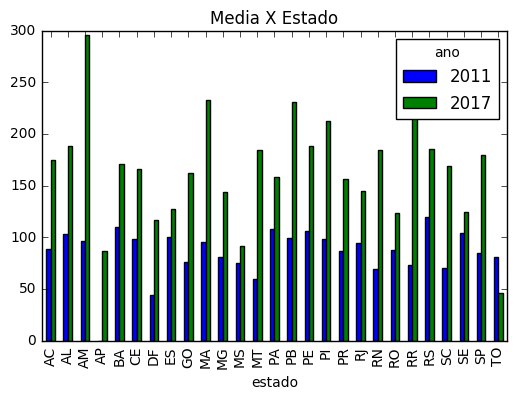

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

dados.pivot(index= 'estado', columns='ano', values='media').plot(kind='bar', title="Media X Estado")

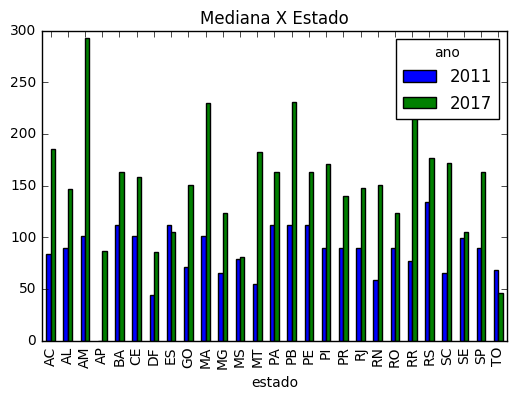

In [14]:
dados.pivot(index= 'estado', columns='ano', values='mediana').plot(kind='bar', title="Mediana X Estado")